## Librerias

Importar las librerias necesarias

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import matplotlib.pyplot as plt

## Data

In [63]:
# abrir las datas 
path=r"C:\Users\darly\Downloads"
data_con_outliner=pd.read_csv(path+r"\dataSalarios_final.csv")
data_sin_outliner=pd.read_csv(path+ r"\dataSalarios_final_outliner.csv")

In [64]:
data_con_outliner.shape, data_sin_outliner.shape

((607, 107), (597, 107))

Valores de x, y para cada data, y sets de entranamiento y prueba

In [65]:
#data con atipicos
#Separar variables predictoras y objetivo
X1 = data_con_outliner.drop(columns=['salary_in_usd'])
y1 = data_con_outliner['salary_in_usd']

# Dividir en entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [66]:
#data sin atipicos
#Separar variables predictoras y objetivo
X2 = data_sin_outliner.drop(columns=['salary_in_usd'])
y2 = data_sin_outliner['salary_in_usd']

# Dividir en entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

## Modelos

### árboles de decisión

In [24]:
# Crear y entrenar el modelo con data con datos atipicos
modelo_arbol1 = DecisionTreeRegressor(random_state=42)
modelo_arbol1.fit(X_train1, y_train1)

# Predecir
y_pred_arbol1 = modelo_arbol1.predict(X_test1)

# Evaluar
r2_arbol1 = r2_score(y_test1, y_pred_arbol1)
mse_arbol1 = mean_absolute_error(y_test1, y_pred_arbol1)
rmse_arbol1 = np.sqrt(mean_squared_error(y_test1, y_pred_arbol1))

# Calcular la desviación estándar de y_test
std_y_test1= y_test1.std()

print("R²:", r2_arbol1)
print("MAE:", mse_arbol1)
print("RMSE:", rmse_arbol1)
print("STD:", std_y_test1)  #ser mas peque  RMSE

R²: 0.5074841776464774
MAE: 8818.975409836066
RMSE: 43446.52989284079
STD: 62163.038069299255


In [25]:
# Crear y entrenar el modelo con data con datos atipicos
modelo_arbol2 = DecisionTreeRegressor(random_state=42)
modelo_arbol2.fit(X_train2, y_train2)

# Predecir
y_pred_arbol2 = modelo_arbol2.predict(X_test2)

# Evaluar
r2_arbol2 = r2_score(y_test2, y_pred_arbol2)
mse_arbol2 = mean_absolute_error(y_test2, y_pred_arbol2)
rmse_arbol2 = np.sqrt(mean_squared_error(y_test2, y_pred_arbol2))

# Calcular la desviación estándar de y_test
std_y_test2= y_test2.std()


print("R²:", r2_arbol2)
print("MAE:", mse_arbol2)
print("RMSE:", rmse_arbol2)
print("STD:", std_y_test2)  #ser mas peque RMSE

R²: 0.8761513299019494
MAE: 5077.25
RMSE: 18162.780554382818
STD: 51826.72957156338


In [26]:
#guardar los modelos
joblib.dump(modelo_arbol1, 'ARBOLES_conOutliner.pkl')
joblib.dump(modelo_arbol2, 'ARBOLES_SinOutliner.pkl')

['ARBOLES_SinOutliner.pkl']

In [28]:
# Comparación de modelos
comparacion_modelos = pd.DataFrame({
    "Modelo": ["ARBOLES 1", "ARBOLES 2"],
    "RMSE": [rmse_arbol1, rmse_arbol2],
    "R²": [r2_arbol1, r2_arbol2]
})
comparacion_modelos

,Modelo,RMSE,R²
0,ARBOLES 1,43446.529893,0.507484
1,ARBOLES 2,18162.780554,0.876151


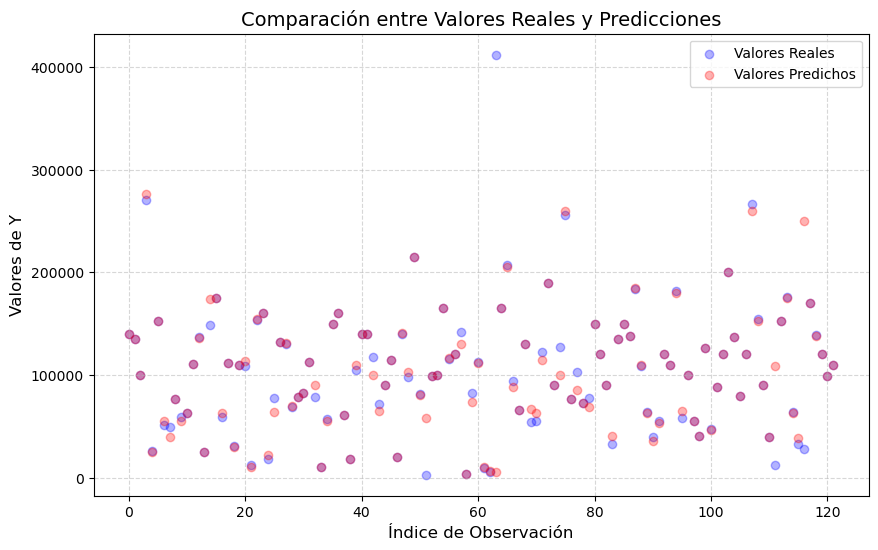

In [34]:
#pintar modelos
#mirar puntos

plt.figure(figsize=(10, 6))

# Graficar cada punto (valor real vs predicho)
plt.scatter(range(len(y_test1)), y_test1, color='blue', label="Valores Reales", alpha=0.3)
plt.scatter(range(len(y_pred_arbol1)), y_pred_arbol1, color='red', label="Valores Predichos", alpha=0.3)

# Configurar el gráfico
plt.xlabel("Índice de Observación", fontsize=12)
plt.ylabel("Valores de Y", fontsize=12)
plt.title("Comparación entre Valores Reales y Predicciones", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar gráfico
plt.show()


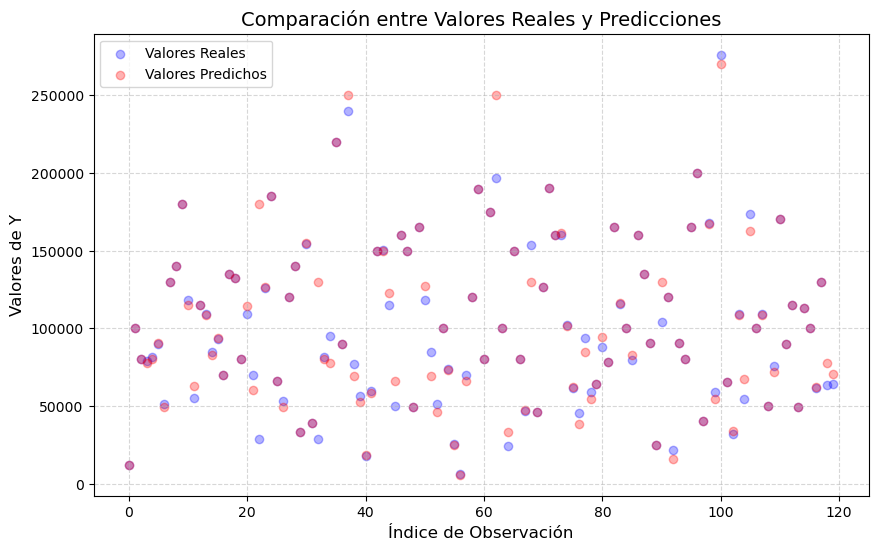

In [33]:
#pintar modelos
#mirar puntos

plt.figure(figsize=(10, 6))

# Graficar cada punto (valor real vs predicho)
plt.scatter(range(len(y_test2)), y_test2, color='blue', label="Valores Reales", alpha=0.3)
plt.scatter(range(len(y_pred_arbol2)), y_pred_arbol2, color='red', label="Valores Predichos", alpha=0.3)

# Configurar el gráfico
plt.xlabel("Índice de Observación", fontsize=12)
plt.ylabel("Valores de Y", fontsize=12)
plt.title("Comparación entre Valores Reales y Predicciones", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar gráfico
plt.show()


## Analizar la profundidad del arbol

In [40]:
#mirar profundida en el arbol ---tener cuidado con el overfiting
modelo_arbol1.get_depth(), modelo_arbol2.get_depth()

(17, 16)

Revisar si no hay sobre entrenamiento u overfiting

Si R² de entrenamiento es muy alto (por ejemplo, 0.99) y el R² de prueba es muy bajo (por ejemplo, 0.6 o negativo), hay overfitting.



In [42]:
 # Predicciones en entrenamiento y prueba
y_pred_train = modelo_arbol1.predict(X_train1)
y_pred_test = modelo_arbol1.predict(X_test1)

# Métricas
r2_train = r2_score(y_train1, y_pred_train)
r2_test = r2_score(y_test1, y_pred_test)

print("R² Entrenamiento:", r2_train)
print("R² Prueba:", r2_test)

R² Entrenamiento: 1.0
R² Prueba: 0.5074841776464774


In [43]:
# Predicciones en entrenamiento y prueba
y_pred_train = modelo_arbol2.predict(X_train2)
y_pred_test = modelo_arbol2.predict(X_test2)

# Métricas
r2_train = r2_score(y_train2, y_pred_train)
r2_test = r2_score(y_test2, y_pred_test)

print("R² Entrenamiento:", r2_train)
print("R² Prueba:", r2_test)

R² Entrenamiento: 1.0
R² Prueba: 0.8761513299019494


### Interpretación
El modelo de árbol de decisión muestra un desempeño perfecto en el conjunto de entrenamiento con un R² de 1.0, lo que indica que ha memorizado completamente esos datos. Sin embargo, en el conjunto de prueba obtiene un R² de 0.876, lo cual sigue siendo un valor alto y refleja una buena capacidad de generalización. Esta diferencia entre ambos resultados sugiere la presencia de un leve sobreajuste, típico de los árboles sin restricciones de profundidad. Aunque el modelo aún ofrece predicciones confiables, podría beneficiarse de ajustes como limitar la profundidad del árbol o aplicar validación cruzada para mejorar su robustez y evitar depender demasiado de los datos de entrenamiento.

In [69]:
for i in range(1,16):

    print("nivel " , i)
    print()
    modelo_arbol = DecisionTreeRegressor(max_depth=i, random_state=42)
    modelo_arbol.fit(X_train2, y_train2)

    # Predicciones en entrenamiento y prueba
    y_pred_train = modelo_arbol.predict(X_train2)
    y_pred_test = modelo_arbol.predict(X_test2)

    # Métricas9
    r2_train = r2_score(y_train2, y_pred_train)
    r2_test = r2_score(y_test2, y_pred_test)

    print("R² Entrenamiento en modelo con depth:", i , r2_train)
    print("R² Prueba en modelo con depth :", i,  r2_test)
    print("::::::::::::::::::::::::::::::::::::::::::::::::::")
    

nivel  1

R² Entrenamiento en modelo con depth: 1 0.39188603730034266
R² Prueba en modelo con depth : 1 0.3629602446992194
::::::::::::::::::::::::::::::::::::::::::::::::::
nivel  2

R² Entrenamiento en modelo con depth: 2 0.694851359452106
R² Prueba en modelo con depth : 2 0.6362895718573363
::::::::::::::::::::::::::::::::::::::::::::::::::
nivel  3

R² Entrenamiento en modelo con depth: 3 0.8542024976116501
R² Prueba en modelo con depth : 3 0.8187174967503166
::::::::::::::::::::::::::::::::::::::::::::::::::
nivel  4

R² Entrenamiento en modelo con depth: 4 0.904889047975608
R² Prueba en modelo con depth : 4 0.8629050948999153
::::::::::::::::::::::::::::::::::::::::::::::::::
nivel  5

R² Entrenamiento en modelo con depth: 5 0.9465122927123668
R² Prueba en modelo con depth : 5 0.8723289390165666
::::::::::::::::::::::::::::::::::::::::::::::::::
nivel  6

R² Entrenamiento en modelo con depth: 6 0.9723101502561459
R² Prueba en modelo con depth : 6 0.8774244143758395
::::::::::::::

### modelo elegido 

* en el análisis parare comportarse mejor con depth 9

In [70]:
# Crear y entrenar el modelo con data con datos atipicos
#el mejor modelo fue depth en 93
modelo_arbol3 = DecisionTreeRegressor(max_depth=9, random_state=42)
modelo_arbol3.fit(X_train2, y_train2)

# Predecir
y_pred_arbol3 = modelo_arbol3.predict(X_test2)

# Evaluar
r2_arbol3 = r2_score(y_test2, y_pred_arbol3)
mse_arbol3 = mean_absolute_error(y_test2, y_pred_arbol3)
rmse_arbol3 = np.sqrt(mean_squared_error(y_test2, y_pred_arbol3))

# Calcular la desviación estándar de y_test
std_y_test3= y_test2.std()


print("R²:", r2_arbol3)
print("MAE:", mse_arbol3)
print("RMSE:", rmse_arbol3)
print("STD:", std_y_test3)  #ser mas peque RMSE

R²: 0.8832525807740219
MAE: 6034.369846524306
RMSE: 17634.384525312922
STD: 51826.72957156338


In [71]:
# Comparación de modelos
comparacion_modelos = pd.DataFrame({
    "Modelo": ["ARBOLES 1", "ARBOLES 2", "ARBOLES 3"],
    "RMSE": [rmse_arbol1, rmse_arbol2, rmse_arbol3],
    "R²": [r2_arbol1, r2_arbol2, r2_arbol3]
})
comparacion_modelos

,Modelo,RMSE,R²
0,ARBOLES 1,43446.529893,0.507484
1,ARBOLES 2,18162.780554,0.876151
2,ARBOLES 3,17634.384525,0.883253


In [74]:
#guardar modelo
#guardar los modelos
joblib.dump(modelo_arbol3, r"C:\Users\darly\Downloads\ARBOLES_sinOutliner_dep9.pkl")

['C:\\Users\\darly\\Downloads\\ARBOLES_sinOutliner_dep9.pkl']

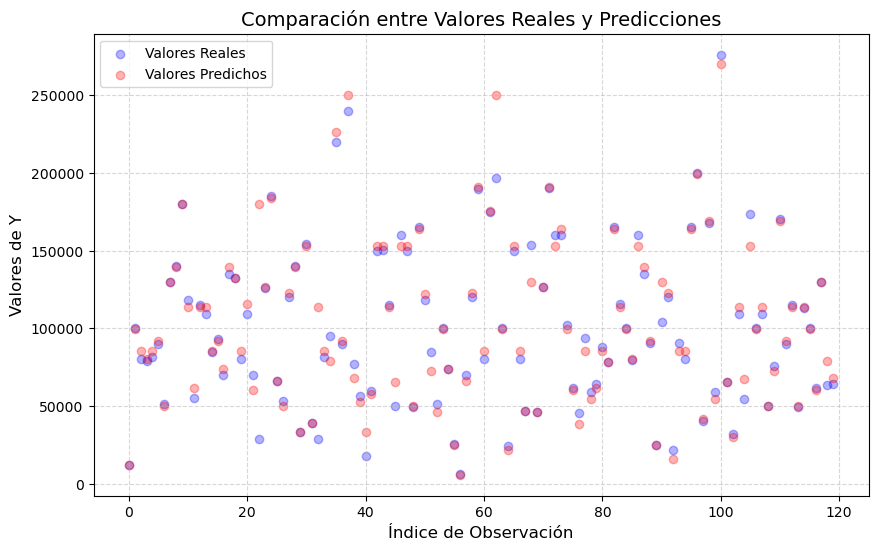

In [75]:
#pintar modelos
#mirar puntos

plt.figure(figsize=(10, 6))

# Graficar cada punto (valor real vs predicho)
plt.scatter(range(len(y_test2)), y_test2, color='blue', label="Valores Reales", alpha=0.3)
plt.scatter(range(len(y_pred_arbol3)), y_pred_arbol3, color='red', label="Valores Predichos", alpha=0.3)

# Configurar el gráfico
plt.xlabel("Índice de Observación", fontsize=12)
plt.ylabel("Valores de Y", fontsize=12)
plt.title("Comparación entre Valores Reales y Predicciones", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar gráfico
plt.show()


### pintar arbol de decisiones

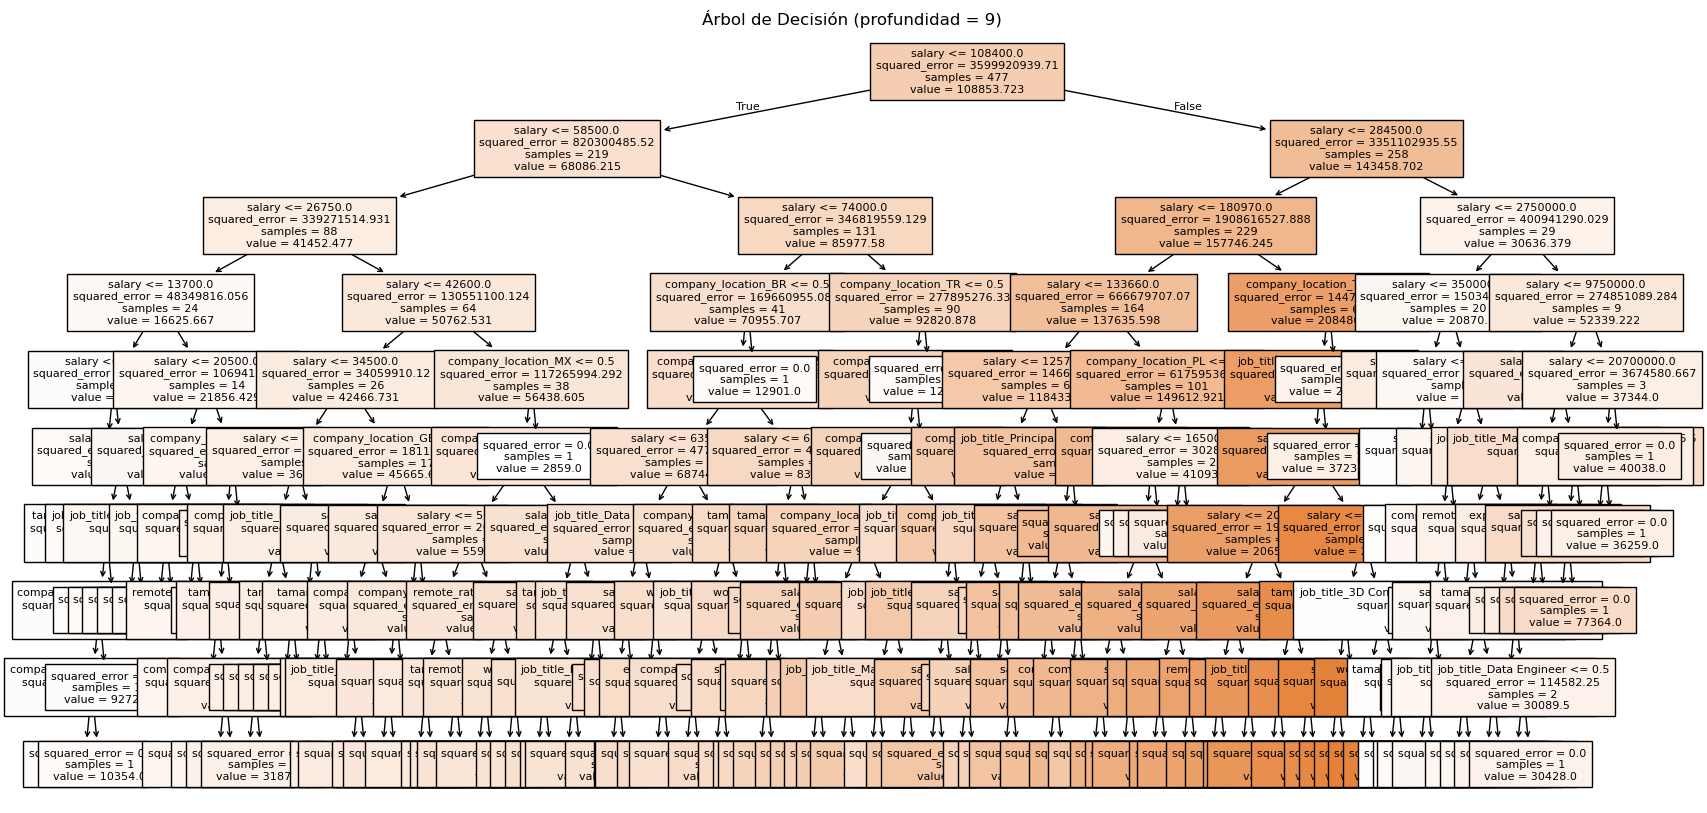

In [78]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))  # Tamaño del gráfico
plot_tree(modelo_arbol3, 
          filled=True, 
          feature_names=X2.columns, 
          fontsize=8)
plt.title("Árbol de Decisión (profundidad = 9)")
plt.show()